In [2]:
import numpy as np
from matplotlib import pyplot
from pandas import read_csv, set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
dataset = read_csv("C:/Users/hp/Desktop/Dataset/sonar.csv")

In [4]:
dataset.shape

(208, 61)

In [5]:
set_option('display.max_rows', 500)
dataset.dtypes

attribute_1     float64
attribute_2     float64
attribute_3     float64
attribute_4     float64
attribute_5     float64
attribute_6     float64
attribute_7     float64
attribute_8     float64
attribute_9     float64
attribute_10    float64
attribute_11    float64
attribute_12    float64
attribute_13    float64
attribute_14    float64
attribute_15    float64
attribute_16    float64
attribute_17    float64
attribute_18    float64
attribute_19    float64
attribute_20    float64
attribute_21    float64
attribute_22    float64
attribute_23    float64
attribute_24    float64
attribute_25    float64
attribute_26    float64
attribute_27    float64
attribute_28    float64
attribute_29    float64
attribute_30    float64
attribute_31    float64
attribute_32    float64
attribute_33    float64
attribute_34    float64
attribute_35    float64
attribute_36    float64
attribute_37    float64
attribute_38    float64
attribute_39    float64
attribute_40    float64
attribute_41    float64
attribute_42    

In [6]:
set_option('display.width', 100)
dataset.head(20)

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,Rock
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,Rock
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,Rock
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,Rock
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,Rock


In [7]:
set_option('precision', 3)
dataset.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


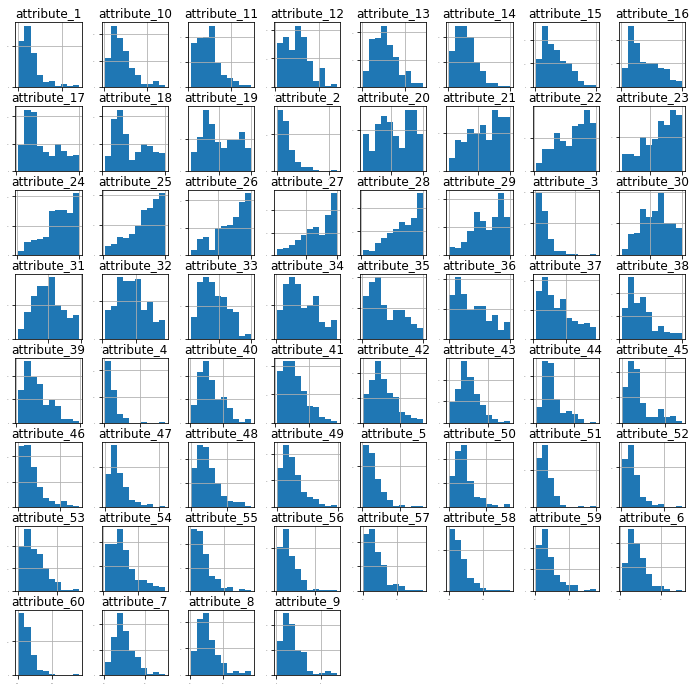

In [10]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

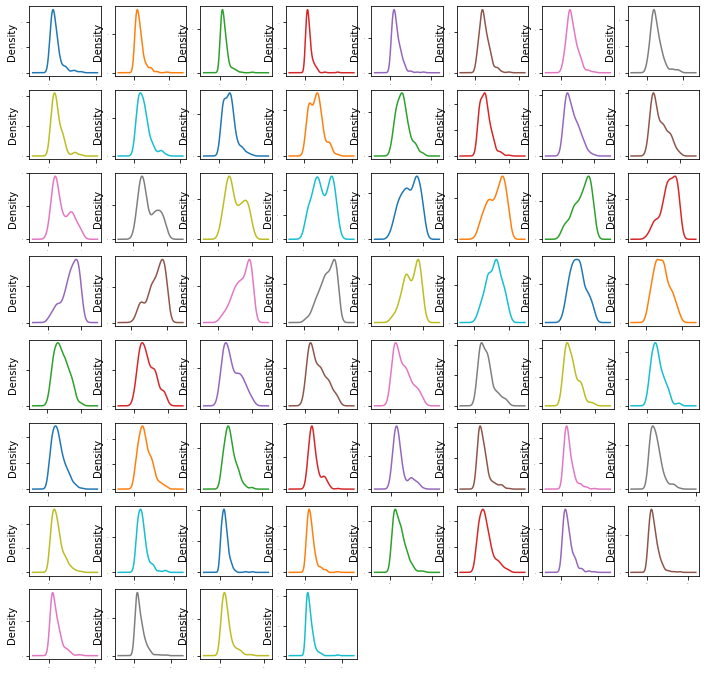

In [11]:
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
pyplot.show()

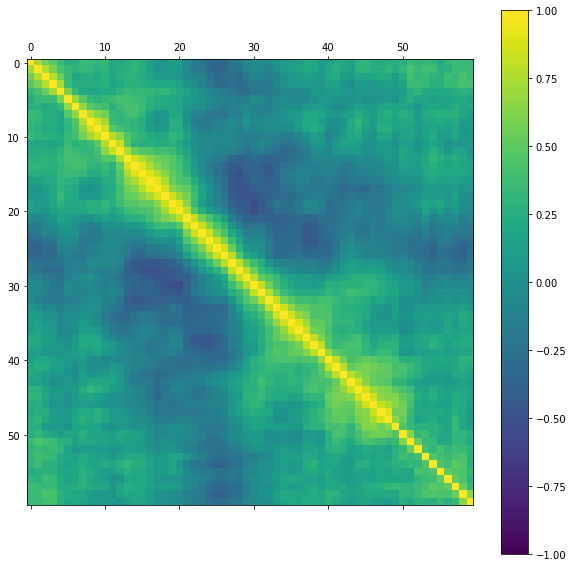

In [12]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,10)
pyplot.show()

In [13]:
array = dataset.values
X = array[:,0:-1].astype(float)
Y = array[:,-1]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [14]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [15]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [16]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR: 0.769485 (0.100510)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LDA: 0.746324 (0.117854)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: 0.808088 (0.067507)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


CART: 0.758456 (0.116725)
NB: 0.648897 (0.141868)
SVM: 0.776471 (0.090411)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


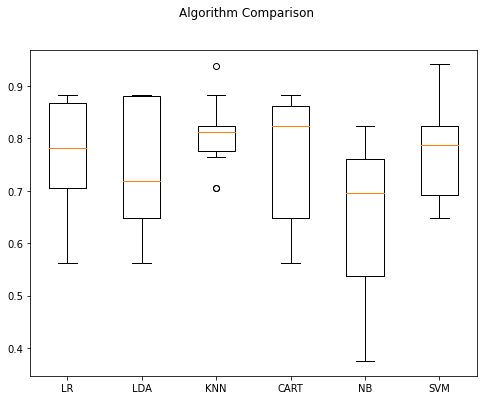

In [17]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()

In [18]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

In [19]:
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledLR: 0.740441 (0.094668)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledCART: 0.717279 (0.109166)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


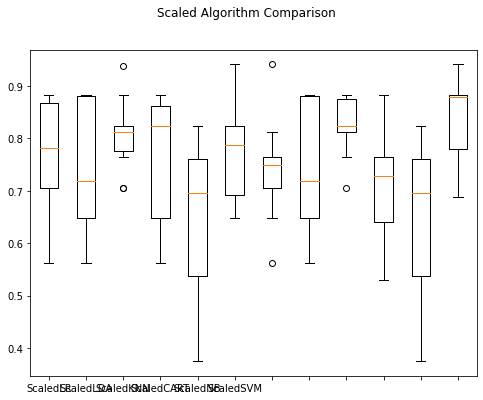

In [20]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()

In [21]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [22]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.850000 using {'n_neighbors': 1}
#1 0.850000 (0.059686) with: {'n_neighbors': 1}
#3 0.837132 (0.066014) with: {'n_neighbors': 3}
#2 0.837500 (0.037377) with: {'n_neighbors': 5}
#4 0.763971 (0.089374) with: {'n_neighbors': 7}
#5 0.751471 (0.087051) with: {'n_neighbors': 9}
#6 0.733456 (0.104831) with: {'n_neighbors': 11}
#7 0.733088 (0.105806) with: {'n_neighbors': 13}
#8 0.727941 (0.076148) with: {'n_neighbors': 15}
#11 0.709926 (0.079287) with: {'n_neighbors': 17}
#9 0.722059 (0.085088) with: {'n_neighbors': 19}
#10 0.710294 (0.109505) with: {'n_neighbors': 21}


In [23]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [24]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.872426 using {'C': 2.0, 'kernel': 'rbf'}
#19 0.758456 (0.099483) with: {'C': 0.1, 'kernel': 'linear'}
#40 0.535294 (0.114222) with: {'C': 0.1, 'kernel': 'poly'}
#39 0.573162 (0.130930) with: {'C': 0.1, 'kernel': 'rbf'}
#36 0.704044 (0.066933) with: {'C': 0.1, 'kernel': 'sigmoid'}
#27 0.746324 (0.109507) with: {'C': 0.3, 'kernel': 'linear'}
#38 0.642647 (0.132187) with: {'C': 0.3, 'kernel': 'poly'}
#16 0.765809 (0.091692) with: {'C': 0.3, 'kernel': 'rbf'}
#31 0.734926 (0.054567) with: {'C': 0.3, 'kernel': 'sigmoid'}
#30 0.740074 (0.082636) with: {'C': 0.5, 'kernel': 'linear'}
#37 0.662132 (0.105668) with: {'C': 0.5, 'kernel': 'poly'}
#12 0.788235 (0.064190) with: {'C': 0.5, 'kernel': 'rbf'}
#25 0.746691 (0.058742) with: {'C': 0.5, 'kernel': 'sigmoid'}
#25 0.746691 (0.084198) with: {'C': 0.7, 'kernel': 'linear'}
#27 0.746324 (0.129754) with: {'C': 0.7, 'kernel': 'poly'}
#11 0.812500 (0.085513) with: {'C': 0.7, 'kernel': 'rbf'}
#17 0.758824 (0.047088) with: {'C': 0.7, 'kernel': 's

In [25]:
ensembles = []

ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))

ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))


In [26]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


AB: 0.819853 (0.058293)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GBM: 0.836029 (0.087762)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RF: 0.818750 (0.084432)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ET: 0.843015 (0.067812)


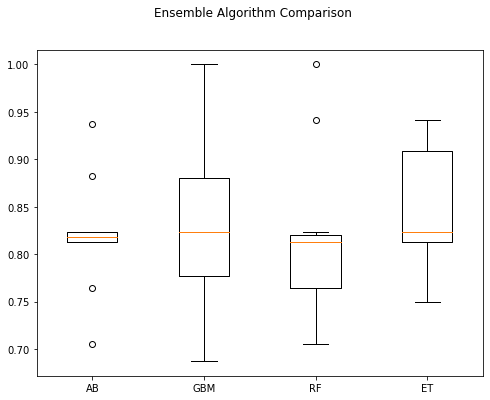

In [27]:
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()

In [28]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5) # rbf is default kernel
model.fit(rescaledX, Y_train)

SVC(C=1.5)

In [29]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

        Mine       0.92      0.85      0.88        27
        Rock       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



In [30]:
predictions

array(['Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Rock', 'Rock', 'Mine',
       'Rock', 'Mine', 'Rock', 'Mine', 'Mine', 'Mine', 'Rock', 'Rock',
       'Rock', 'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine',
       'Rock', 'Rock', 'Rock', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine',
       'Rock', 'Mine', 'Rock', 'Mine', 'Mine', 'Rock', 'Mine', 'Mine',
       'Mine', 'Rock'], dtype=object)

In [31]:
Y_validation

array(['Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine', 'Rock',
       'Rock', 'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Rock', 'Rock',
       'Mine', 'Rock', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine', 'Mine',
       'Mine', 'Rock', 'Rock', 'Mine', 'Mine', 'Mine', 'Rock', 'Mine',
       'Rock', 'Mine', 'Rock', 'Mine', 'Mine', 'Rock', 'Mine', 'Mine',
       'Mine', 'Rock'], dtype=object)